# Application of ASLTranslator Module

In [5]:
import os
from ASLT import ASLTranslator
aslt = ASLTranslator(None, None)

# Collect Data

In [3]:
words = ['Hello', 'yes', 'no']
data_path = 'test_data'
for word in words:
    aslt.collect_word_data(word, data_path, samp_count = 5, frame_count = 10)

# Load data

In [4]:
sequences, labels = aslt.get_npy_from_directory(data_path)

Loading data for Hello-0-0.npy .....
Loading data for Hello-0-1.npy .....
Loading data for Hello-0-2.npy .....
Loading data for Hello-0-3.npy .....
Loading data for Hello-0-4.npy .....
Loading data for Hello-0-5.npy .....
Loading data for Hello-0-6.npy .....
Loading data for Hello-0-7.npy .....
Loading data for Hello-0-8.npy .....
Loading data for Hello-0-9.npy .....
Loading data for Hello-0_r-0_r.npy .....
Loading data for Hello-0_r-1_r.npy .....
Loading data for Hello-0_r-2_r.npy .....
Loading data for Hello-0_r-3_r.npy .....
Loading data for Hello-0_r-4_r.npy .....
Loading data for Hello-0_r-5_r.npy .....
Loading data for Hello-0_r-6_r.npy .....
Loading data for Hello-0_r-7_r.npy .....
Loading data for Hello-0_r-8_r.npy .....
Loading data for Hello-0_r-9_r.npy .....
Loading data for Hello-1-0.npy .....
Loading data for Hello-1-1.npy .....
Loading data for Hello-1-2.npy .....
Loading data for Hello-1-3.npy .....
Loading data for Hello-1-4.npy .....
Loading data for Hello-1-5.npy ....

# Create model

In [35]:
with open(os.path.join(data_path, 'word_list.txt')) as file:
    words = [line.rstrip() for line in file]
model = aslt.create_model(len(words), interval = 10)
x_train, x_test, x_val, y_train, y_test, y_val = aslt.split_data(sequences, labels)

# Train model

In [36]:
import tensorflow as tf

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 0.0594 - categorical_accuracy: 0.9670
Epoch 1: val_categorical_accuracy improved from -inf to 0.91304, saving model to checkpoints\mdl-01-0.913043.hdf5
3/3 [==============================] - 1s 239ms/step - loss: 0.0594 - categorical_accuracy: 0.9670 - val_loss: 0.1451 - val_categorical_accuracy: 0.9130
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 0.0918 - categorical_accuracy: 0.9670
Epoch 2: val_categorical_accuracy did not improve from 0.91304
3/3 [==============================] - 1s 180ms/step - loss: 0.0918 - categorical_accuracy: 0.9670 - val_loss: 0.1557 - val_categorical_accuracy: 0.9130
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 0.0940 - categorical_accuracy: 0.9451
Epoch 3: val_categorical_accuracy did not improve from 0.91304
3/3 [==============================] - 1s 187ms/step - loss: 0.0940 - categorical_accuracy: 0.9451 - val_loss: 0.4155 - val_categorical_acc

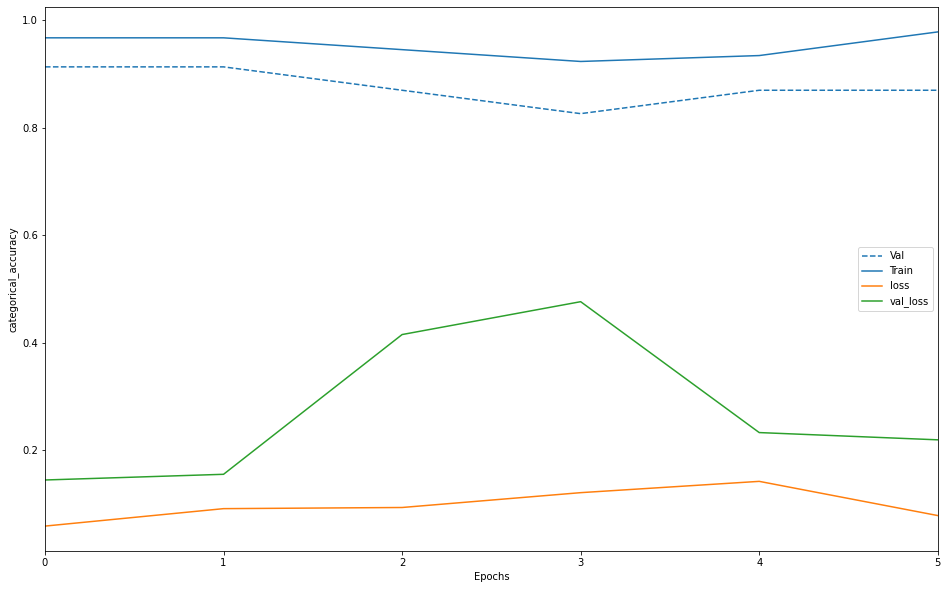

In [46]:
train_data = (x_train, y_train)
val_data = (x_val, y_val)
with tf.device('/gpu:0'):
    aslt.train_model(model, train_data, val_data, plot = True, epochs = 100, model_name='test_model.h5')

In [47]:
test_error, accuracy = model.evaluate(x_test, y_test, verbose=1)

1/1 [==============================] - 0s 50ms/step - loss: 0.3293 - categorical_accuracy: 0.8333


# TEST APPLICATION

In [48]:
MODEL_PATH = 'test_model.h5'
WORDLIST_PATH = os.path.join(data_path, 'word_list.txt')

In [49]:
aslt = ASLTranslator(MODEL_PATH, WORDLIST_PATH)

In [50]:
aslt.start_capture(threshold = 0.8, draw = [True, False, True, True])

Start video Capture
Press Q to exit
